In [1]:
# importing libraries
import numpy as np
import pandas as pd

# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

## <font color=blue>Data Preparation</font>

In [2]:
# reading dataset
data = pd.read_csv('Leads.csv')
print(data.shape)
data.head(5)

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### <font color=blue>Checking unique values for 'Prospect ID' in dataset</font>

In [5]:
data['Prospect ID'].nunique()

9240

### <font color=red>We have all unique values for 'Prospect ID' in dataset</font>

In [6]:
data.describe(include='O').transpose()

,count,unique,top,freq
Prospect ID,9240,9240,a973c595-96d2-4963-a20e-e025da18a4cf,1
Lead Origin,9240,5,Landing Page Submission,4886
Lead Source,9204,21,Google,2868
Do Not Email,9240,2,No,8506
Do Not Call,9240,2,No,9238
Last Activity,9137,17,Email Opened,3437
Country,6779,38,India,6492
Specialization,7802,19,Select,1942
How did you hear about X Education,7033,10,Select,5043
What is your current occupation,6550,6,Unemployed,5600


### <font color=red>We see many columns have value as "select" which is due to the fact no value is selected by customer for that field, so we will consider that value as Null</font>

In [7]:
# Converting "select" values to NULL
data = data.replace('Select', np.nan)

### <font color=blue>Checking NULL values</font>

In [8]:
(data.isnull().sum()/len(data)*100).round(2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

### <font color=blue>Removing fields having more than 70% NULL values</font>

In [9]:
data = data.drop(data.loc[:,list(((data.isnull().sum()/len(data)*100).round(2)>70))].columns,axis=1)

In [10]:
print(data.shape)
data.head()

(9240, 35)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## <font color=blue>Column - Lead Quality</font>

### <font color=blue>Lead Quality is based on employees judgement so NULL values can be safely imputed with field 'Not Sure'</font>

In [11]:
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

### <font color=blue>Plotting Lead Quality Distribution</font>

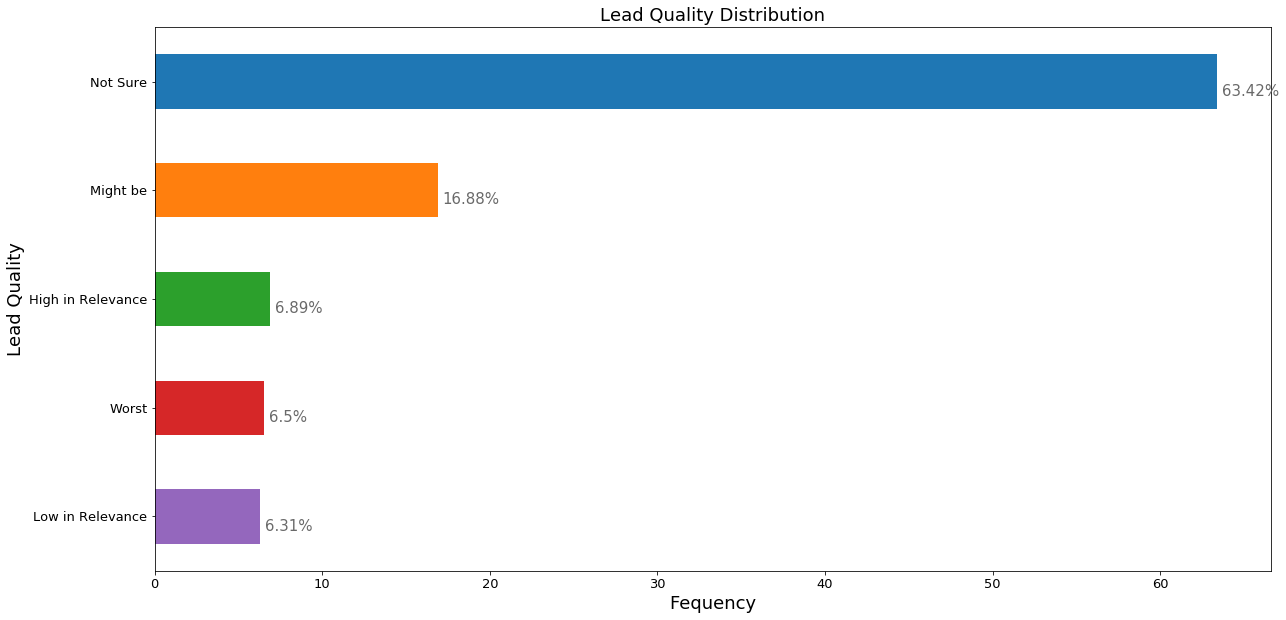

In [12]:
ax = (data['Lead Quality'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Lead Quality Distribution", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("Lead Quality", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

## <font color=blue>Column - Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score</font>

In [13]:
(data[['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']].isnull().sum(axis=1).value_counts(normalize=True)*100).round(2)

0    54.35
4    45.65
dtype: float64

### <font color=red>We observe that same record has NULL values for all four columns</font>
    Asymmetrique Activity Index
    Asymmetrique Profile Index
    Asymmetrique Activity Score
    Asymmetrique Profile Score

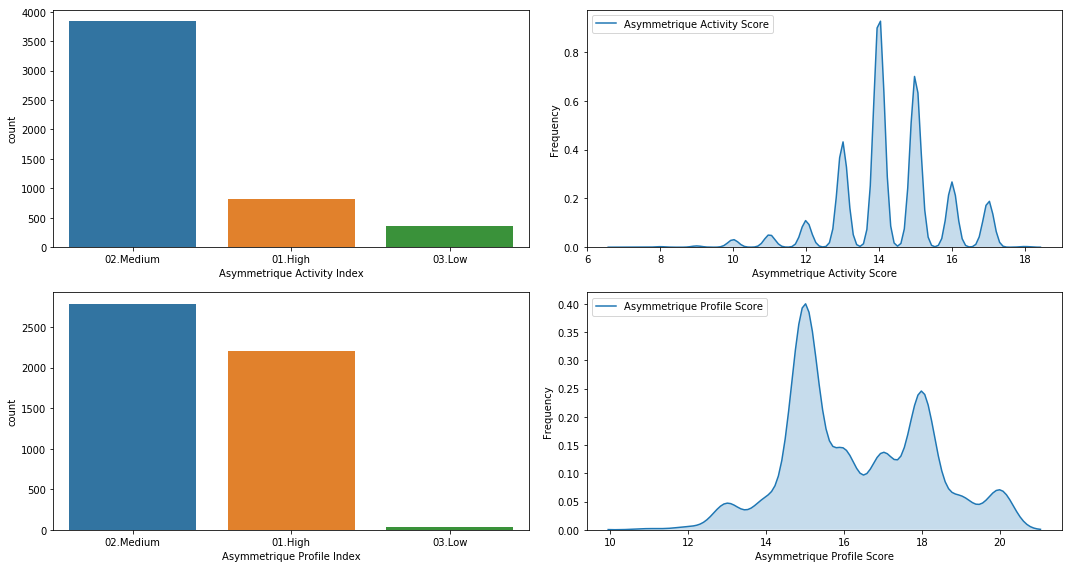

In [14]:
#plt.figure(figsize=(10,10))

fig, axs = plt.subplots(2,2, figsize = (15,8))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.kdeplot(data['Asymmetrique Activity Score'], shade=True, ax = axs[0,1])
plt2.set_ylabel('Frequency')
plt2.set_xlabel('Asymmetrique Activity Score')
plt2.legend(loc='upper left')
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.kdeplot(data['Asymmetrique Profile Score'], shade=True, ax = axs[1,1])
plt4.set_ylabel('Frequency')
plt4.set_xlabel('Asymmetrique Profile Score')
plt4.legend(loc='upper left')
plt.tight_layout()

### <font color=red>We observe too much variation in these fields so imputing any value won't be reliable</font>
### <font color=red>45% NULL values make it good contendor for dropping, hence we will drop these columns</font>

In [15]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

In [16]:
print(data.shape)
data.head(5)

(9240, 31)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


## <font color=blue>Column - City</font>

### <font color=blue>Plotting City Distribution</font>

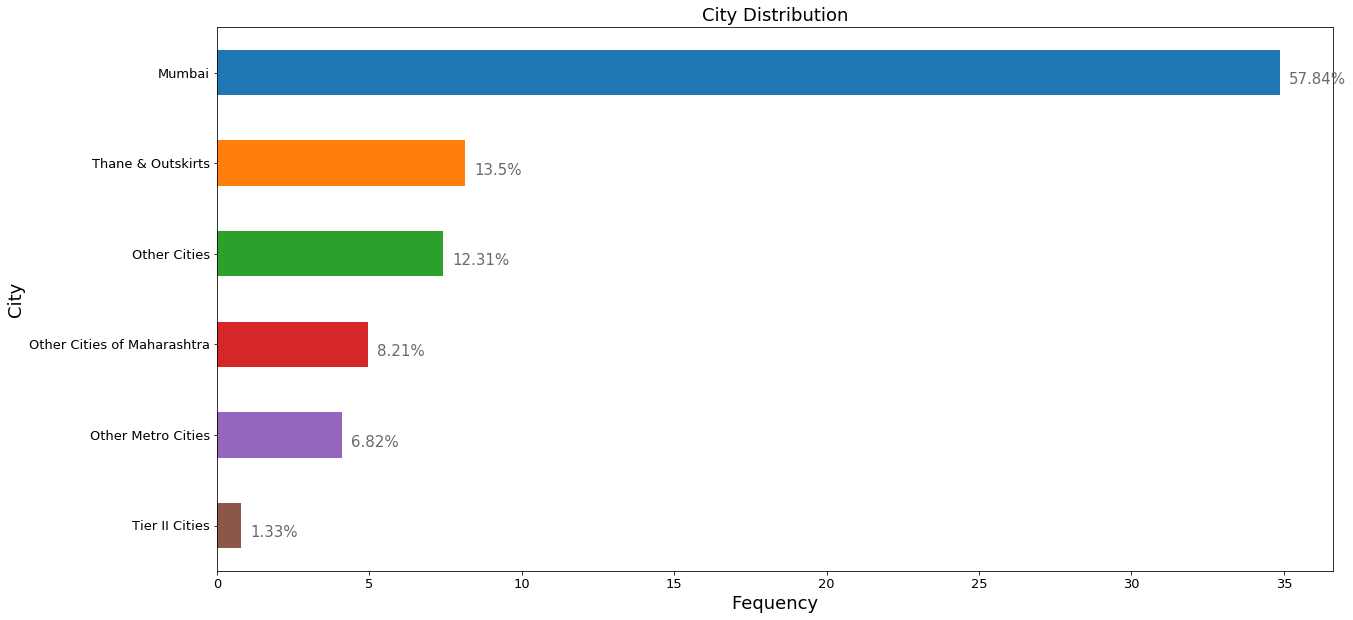

In [17]:
ax = (data['City'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("City Distribution", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("City", fontsize=18)
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>We observe more than 50% custmers are from Mumbai, for City missing values we can categorise them under "Unknown Cities"</font>

In [18]:
data['City'] = data['City'].replace(np.nan,'Unknown Cities')

In [19]:
(data['City'].value_counts(normalize=True)*100).round(2)

Unknown Cities                 39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

## <font color=blue>Column - Specialization</font>

### <font color=blue>Plotting Specialization Distribution</font>

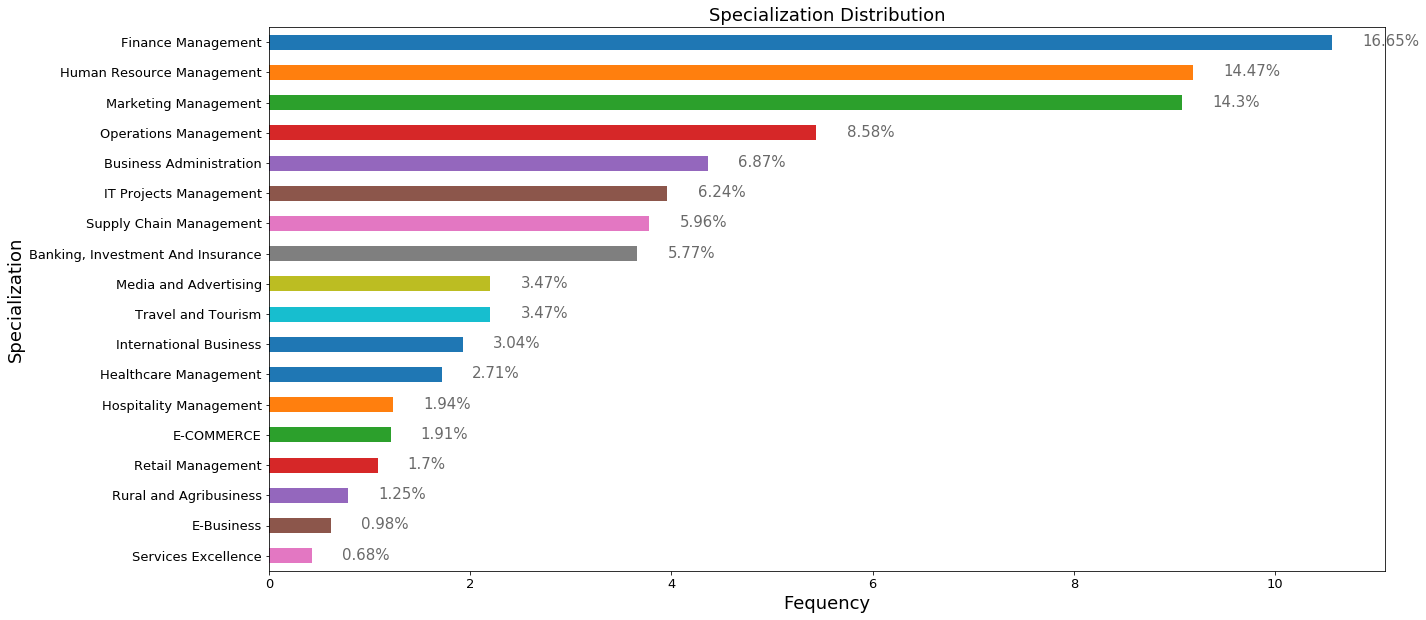

In [20]:
ax = (data['Specialization'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Specialization Distribution", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("Specialization", fontsize=18)
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>Specialization is unevenly spread across 18 Specializations, to address NULL values put it in "Others" specialization.</font>

In [21]:
data['Specialization'] = data['Specialization'].replace(np.nan,'Others')

In [22]:
(data['Specialization'].value_counts(normalize=True)*100).round(2)

Others                               36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

## <font color=blue>Column - Tags</font>

### <font color=blue>Plotting Tags Distribution</font>

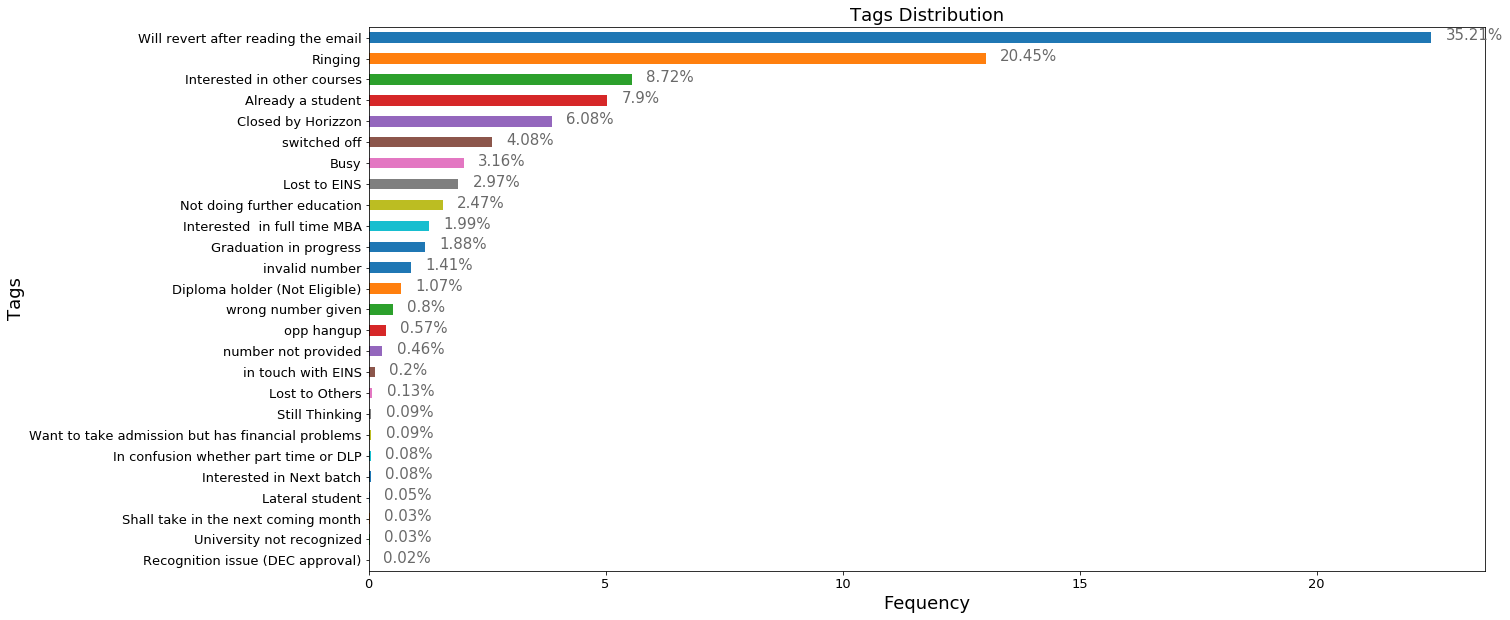

In [23]:
ax = (data['Tags'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Tags Distribution", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("Tags", fontsize=18)
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>NULL tags can be updated with "Will revert after reading the email".</font>

In [24]:
data['Tags'] = data['Tags'].replace(np.nan,'Will revert after reading the email')

In [25]:
(data['Tags'].value_counts(normalize=True)*100).round(2)

Will revert after reading the email                  58.71
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

## <font color=blue>Column - What matters most to you in choosing a course</font>

### <font color=blue>Plotting "What matters most to you in choosing a course" Distribution</font>

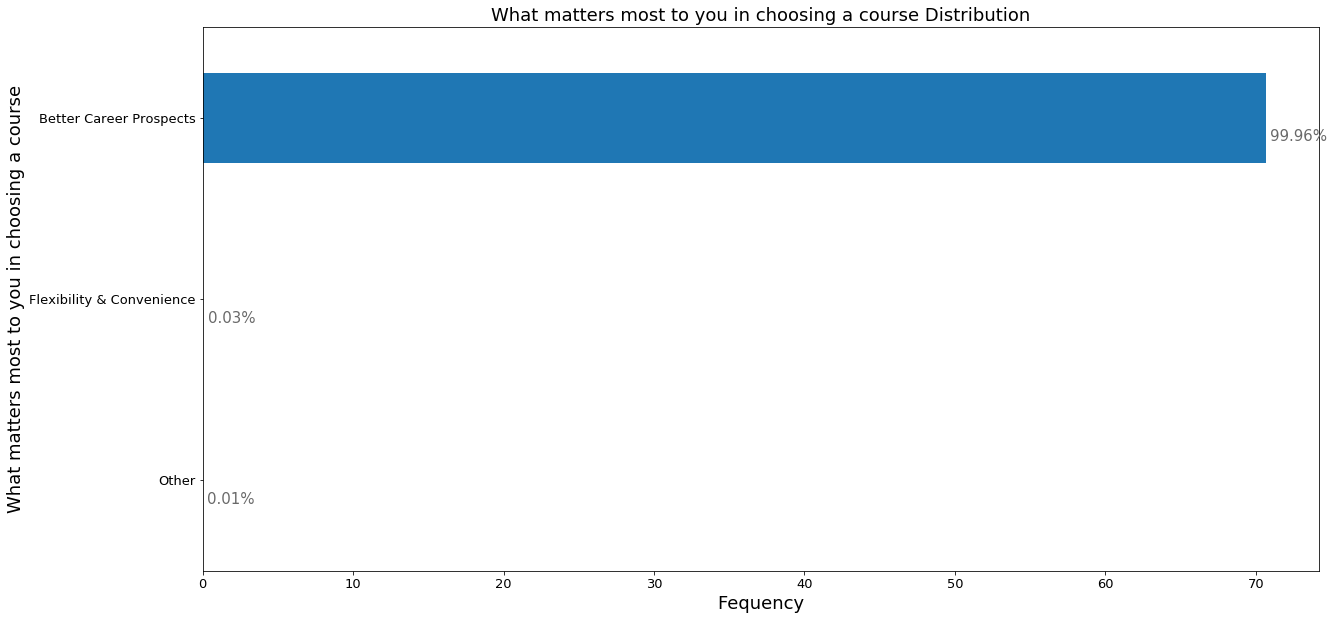

In [26]:
ax = (data['What matters most to you in choosing a course'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What matters most to you in choosing a course Distribution", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("What matters most to you in choosing a course", fontsize=18)
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>"What matters most to you in choosing a course" has value "Better Career Prospects" for more than 99% values, hence we can safely impute that same for missing values.</font>

In [27]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [28]:
(data['What matters most to you in choosing a course'].value_counts(normalize=True)*100).round(2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

## <font color=blue>Column - What is your current occupation</font>

### <font color=blue>Plotting "What is your current occupation" Distribution</font>

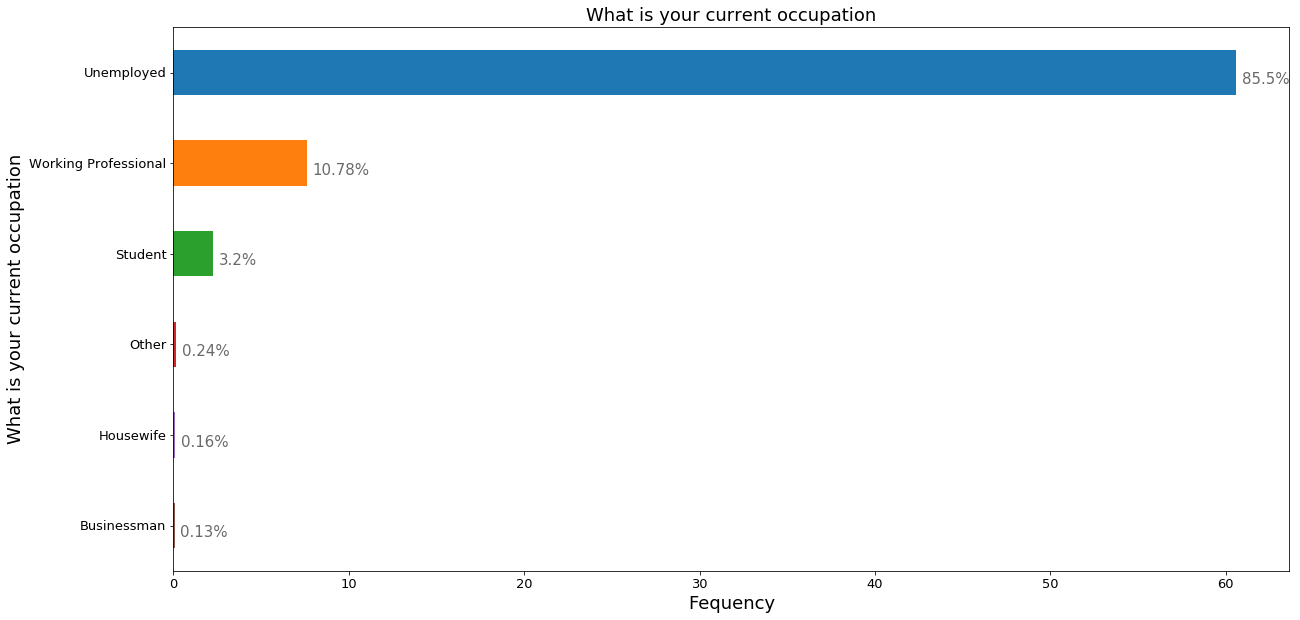

In [29]:
ax = (data['What is your current occupation'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What is your current occupation", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("What is your current occupation", fontsize=18)
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>"What is your current occupation" has value "Unemployed" for more than 85% values, hence we can safely impute the same for missing values.</font>

In [30]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan,'Unemployed')

In [31]:
(data['What is your current occupation'].value_counts(normalize=True)*100).round(2)

Unemployed              89.72
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

## <font color=blue>Column - Country</font>

### <font color=blue>Plotting Country Distribution</font>

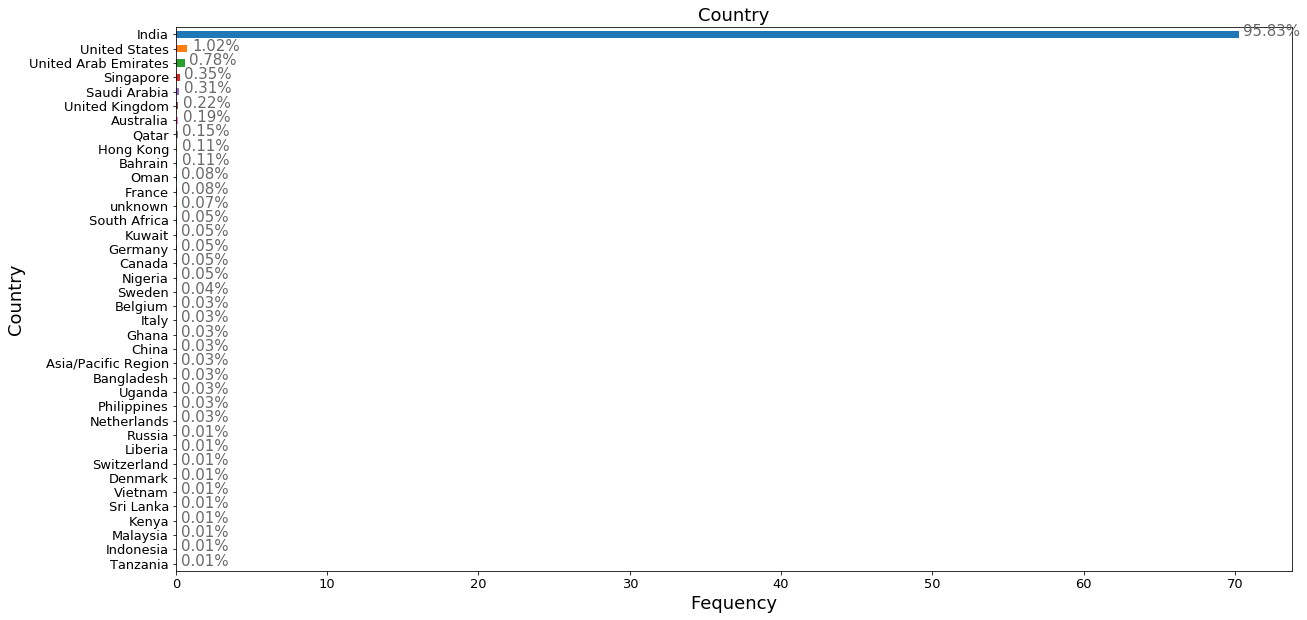

In [32]:
ax = (data['Country'].value_counts()/len(data)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Country", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("Country", fontsize=18)
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>"Country" has value "India" for more than 95% values, hence we can safely impute the same for missing values.</font>

In [33]:
data['Country'] = data['Country'].replace(np.nan,'India')

In [34]:
(data['Country'].value_counts(normalize=True)*100).round(2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Kuwait                   0.04
Germany                  0.04
Canada                   0.04
Nigeria                  0.04
Sweden                   0.03
Belgium                  0.02
Italy                    0.02
Ghana                    0.02
China                    0.02
Asia/Pacific Region      0.02
Bangladesh               0.02
Uganda                   0.02
Philippines              0.02
Netherlands              0.02
Russia                   0.01
Liberia                  0.01
Switzerland              0.01
Denmark                  0.01
Vietnam                  0.01
Sri Lanka 

### <font color=blue>Checking NULL values again</font>

In [35]:
(data.isnull().sum()/len(data)*100).round(2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What matters most to you in choosing a course    0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
Magazine                                         0.00
Newspaper Article           

In [36]:
data[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [37]:
data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
blog                    1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

### <font color=red>NULL values less than 1.5% and we cannot impute any other values in these columns('TotalVisits','Page Views Per Visit','Last Activity','Lead Source') so we can go ahead and drop rows having nulls</font>

In [39]:
data.dropna(inplace=True)

In [40]:
# NA check
(data.isnull().sum()/len(data)*100).round(2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [41]:
# shape of dataset post cleaning
data.shape

(9074, 31)

In [42]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Unknown Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Unknown Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


### <font color=red>Finally we have clean data!!</font>

## <font color=blue>Exploratory Data Analysis(EDA)</font>

### <font color=blue>Univariate & Bivariate Analysis</font>

In [43]:
data.describe(include='O').transpose()

,count,unique,top,freq
Prospect ID,9074,9074,a973c595-96d2-4963-a20e-e025da18a4cf,1
Lead Origin,9074,4,Landing Page Submission,4885
Lead Source,9074,21,Google,2868
Do Not Email,9074,2,No,8358
Do Not Call,9074,2,No,9072
Last Activity,9074,17,Email Opened,3432
Country,9074,38,India,8787
Specialization,9074,19,Others,3282
What is your current occupation,9074,6,Unemployed,8159
What matters most to you in choosing a course,9074,3,Better Career Prospects,9072


### <font color=red>Observation - We notice lot of variables have single value with more than 99% frequency that is they have less than 1% variance, these variables do not add any value to dataframe and can be dropped</font>

In [44]:
var_drop = pd.DataFrame(data.describe(include='O').transpose())
var_drop_col = list(var_drop[var_drop['freq']>(len(data)*0.99)].index)

In [45]:
var_drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [46]:
#dropping variables which have single value with 99% frequency
data = data.drop(var_drop_col,axis=1)

In [47]:
print(data.shape)
data.head()

(9074, 18)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Unknown Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Not Sure,Unknown Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


### <font color=blue>1. Conversion Ratio</font>

In [48]:
(sum(data['Converted'])/len(data['Converted'])*100)

37.85541106458012

### <font color=red>Conversion Ratio - 37.85%</font>

### <font color=blue>2. Lead Origin vs Conversion ratio</font>

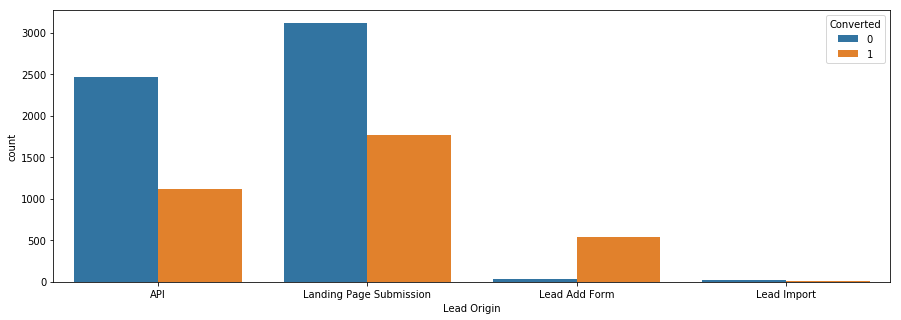

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x="Lead Origin", hue="Converted", data=data)
plt.show()

### <font color=Red>Observation - Lead origin</font>
#####  <font color=Red>'Lead Add Form' have apprx. 90% conversion
##### <font color=Red>Landing Page Submission' and 'API' have appx. 30-35% conversion.
##### <font color=Red>More than 50% of conversion comes from 'Landing Page Submission'

### <font color=blue>3. Lead Source vs Conversion ratio</font>

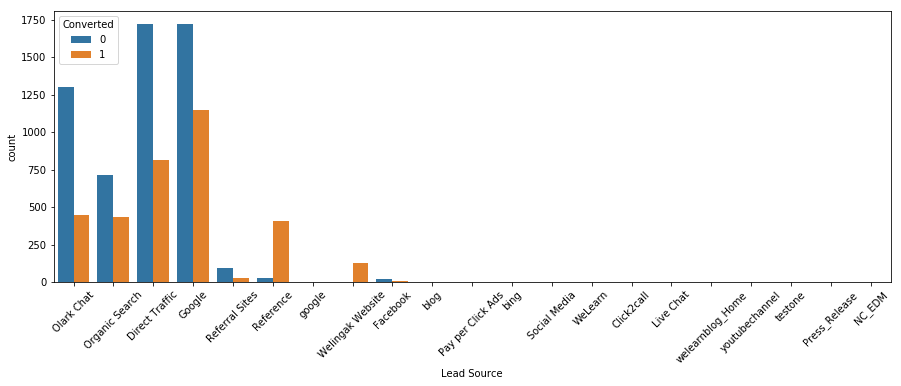

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x='Lead Source', hue='Converted', data = data)
plt.xticks(rotation=45)
plt.show()

In [51]:
# Correcting 'google' to 'Google'
data['Lead Source'] = data['Lead Source'].replace('google','Google')

# Combining sources which contribute less than 1% in single category 'Misc'
data['Lead Source'] = data['Lead Source'].replace([ 'bing','Click2call','Social Media','Live Chat','Press_Release','youtubechannel',
  'WeLearn','NC_EDM','blog','welearnblog_Home','testone','Pay per Click Ads'], 'Misc')

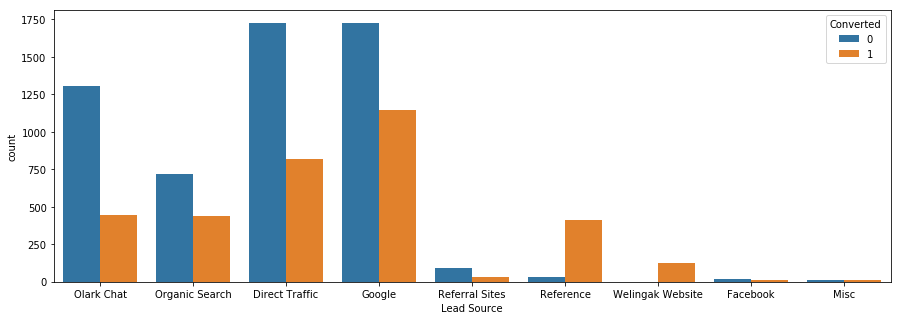

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x="Lead Source", hue="Converted", data=data)
plt.show()

### <font color=Red>Observation - Lead Source</font>
#####  <font color=Red>Maximum number of leads are generated from 'Direct Traffic' and 'Google'</font>
##### <font color=Red>Maximum conversion of leads is observed from 'Reference' and 'Welingak Website'</font>

### <font color=blue>4. Do Not Email vs Conversion Ratio</font>

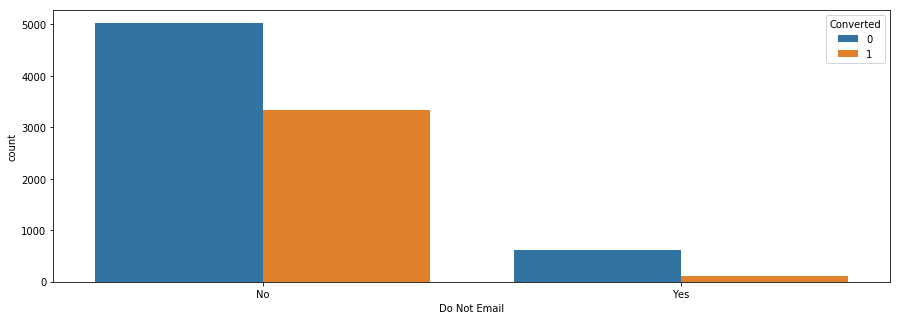

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(x='Do Not Email', hue='Converted', data = data)
plt.show()

### <font color=Red>Observation - Do Not Email</font>
#####  <font color=Red>Lead who opted for 'Do Not Email' also have conversion rate though it is around 10%</font>

### <font color=blue>5. Total Visits vs Conversion ratio</font>

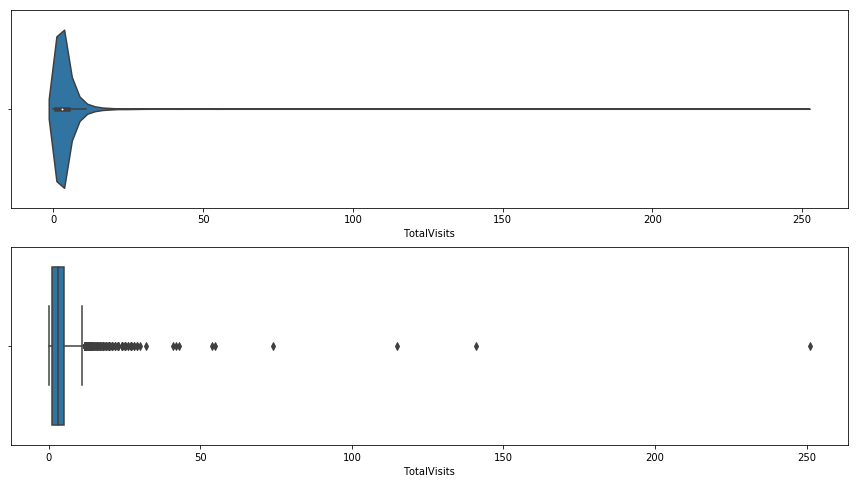

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
80%         5.000000
85%         6.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(x='TotalVisits', data = data, split=True)
plt.subplot(212)
sns.boxplot(x='TotalVisits', data = data)
plt.show()

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .80, .85, .90, .95, .99])

### <font color=red>We are noticing lot of outliers here, we will update records which are above 95% with 95% data. Which states any lead having more than 10 visits will be considered as 10 visits.</font>

In [55]:
data['TotalVisits'][data['TotalVisits'] > data['TotalVisits'].quantile([0.95]).values[0]] = data['TotalVisits'].quantile([0.95]).values[0]

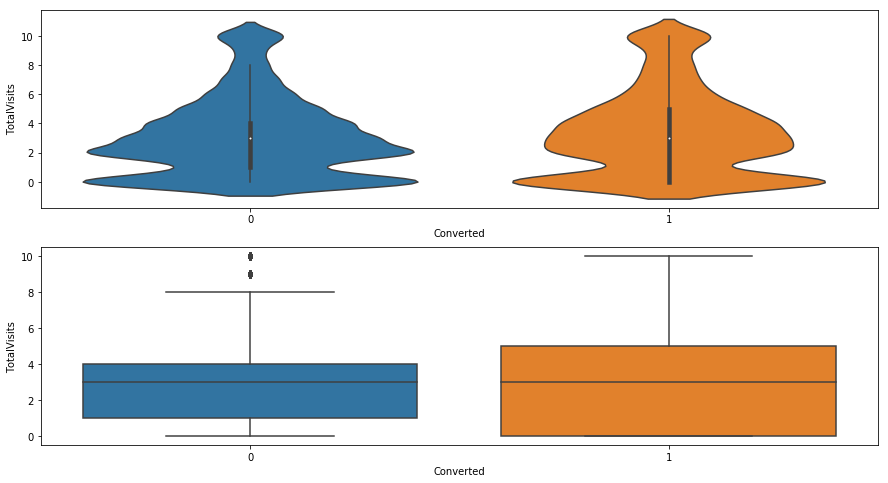

In [56]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(y='TotalVisits', x='Converted', data = data, split=True)
plt.subplot(212)
sns.boxplot(y='TotalVisits', x='Converted', data = data)
plt.show()

### <font color=Red>Observation - TotalVisits</font>
#####  <font color=Red>Median for both converted and not coverted is same</font>
#####  <font color=Red>Inter Quartile Range for Converted is more than not converted</font>

### <font color=blue>6. Total Time Spent on Website vs Conversion ratio</font>

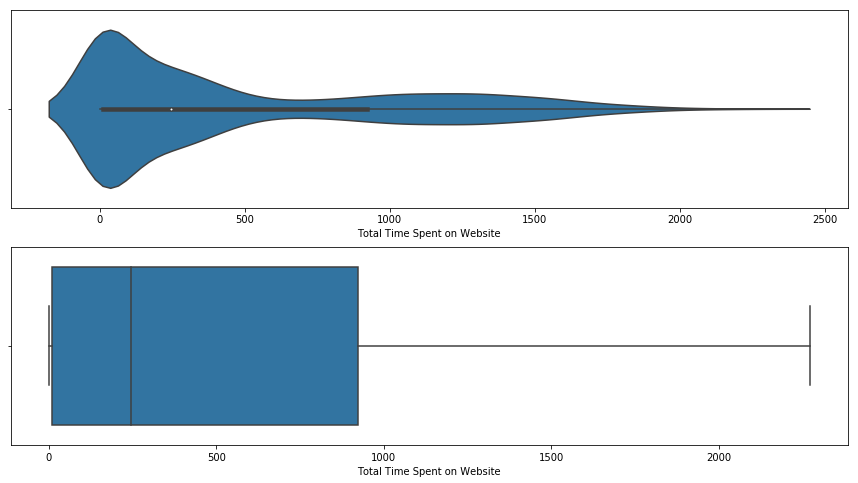

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
80%      1078.400000
85%      1226.000000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(x='Total Time Spent on Website', data = data, split=True)
plt.subplot(212)
sns.boxplot(x='Total Time Spent on Website', data = data)
plt.show()

data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .80, .85, .90, .95, .99])

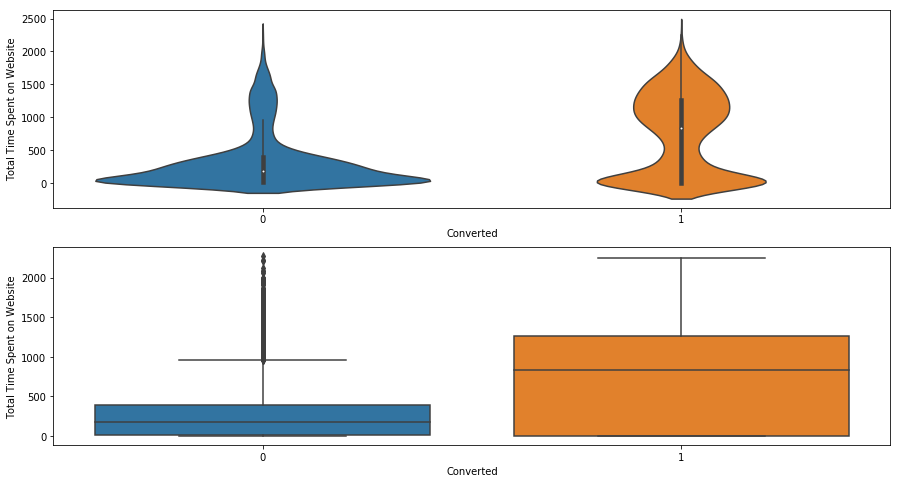

In [58]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(y='Total Time Spent on Website', x='Converted', data = data, split=True)
plt.subplot(212)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data = data)
plt.show()

### <font color=Red>Observation - Total Time Spent on Website</font>
#####  <font color=Red>Leads who tend to spend not time on website are more likely to be not converted</font>
#####  <font color=Red>Leads spending more time on website are more likely to be converted.</font>

### <font color=blue>7. Page Views Per Visit</font>

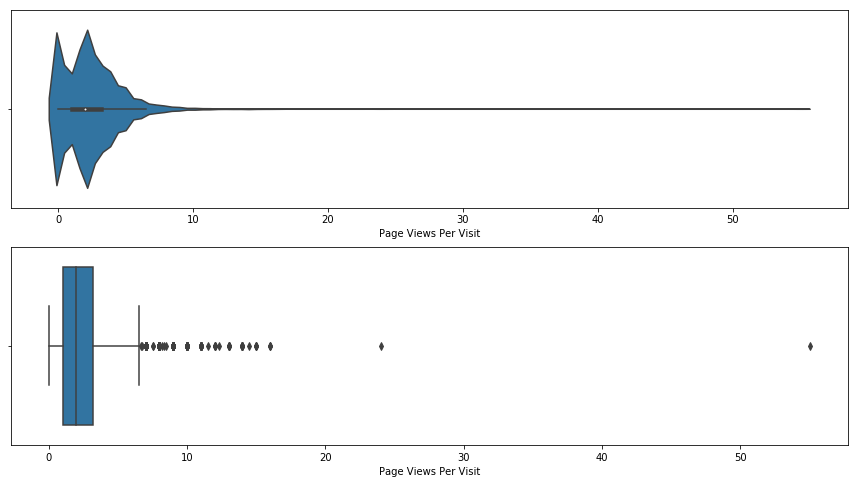

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
80%         4.000000
85%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [59]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(x='Page Views Per Visit', data = data, split=True)
plt.subplot(212)
sns.boxplot(x='Page Views Per Visit', data = data)
plt.show()

data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .80, .85, .90, .95, .99])

### <font color=red>We are noticing lot of outliers here, we will update records which are above 95% with 95% data. Which states any lead having more than 6 page views per visit will be considered as 6 page views per visit.</font>

In [60]:
data['Page Views Per Visit'][data['Page Views Per Visit'] > data['Page Views Per Visit'].quantile([0.95]).values[0]] = data['Page Views Per Visit'].quantile([0.95]).values[0]

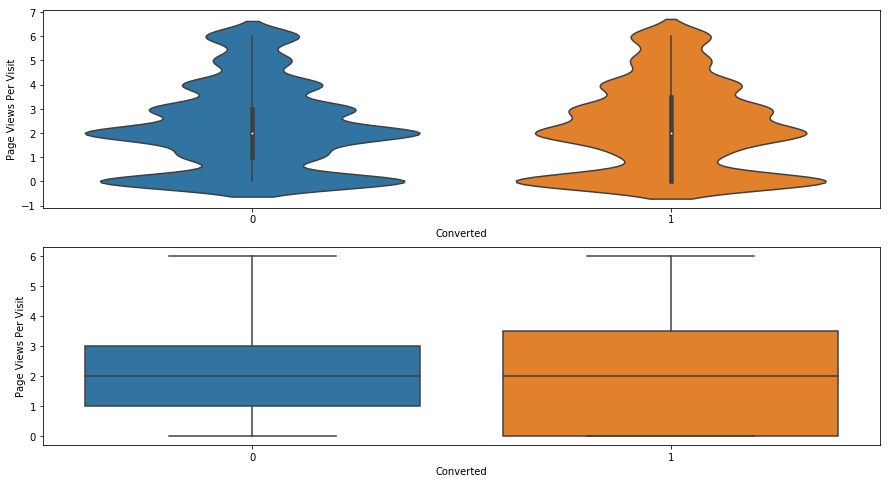

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(y='Page Views Per Visit', x='Converted', data = data, split=True)
plt.subplot(212)
sns.boxplot(y='Page Views Per Visit', x='Converted', data = data)
plt.show()

### <font color=Red>Observation - Page Views Per Visit</font>
#####  <font color=Red>Median for both converted and not coverted is same</font>
#####  <font color=Red>Inter Quartile Range for Converted is more than not converted</font>

### <font color=blue>8. Last Activity vs Conversion ratio</font>

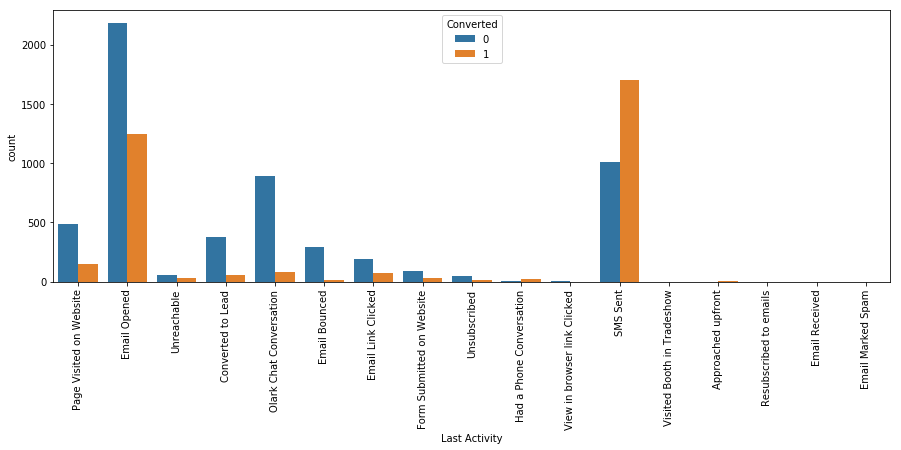

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x='Last Activity', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

In [63]:
# Combining Tags which contribute less than 1% in single category 'Other Tags'
temp = pd.DataFrame(data['Last Activity'].value_counts())
col_replace = temp[temp['Last Activity']<(len(data)*0.01)].index
data['Last Activity'] = data['Last Activity'].replace(col_replace, 'Other Activity')

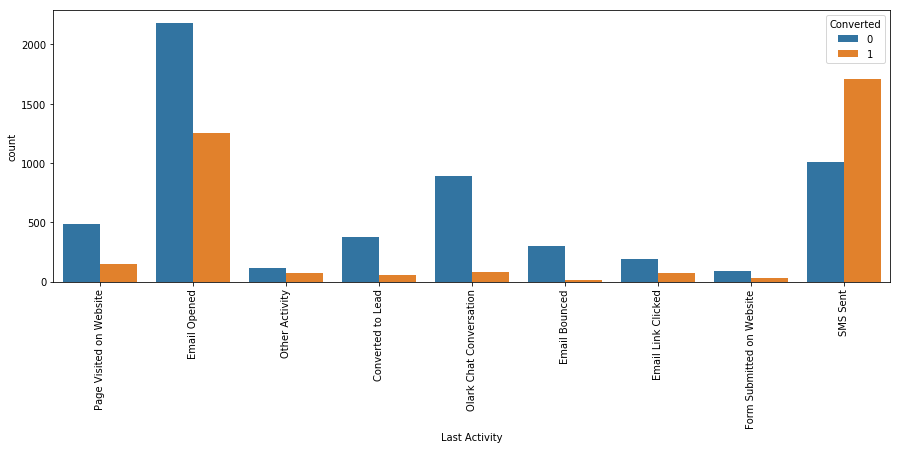

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x="Last Activity", hue="Converted", data=data)
plt.xticks(rotation=90)
plt.show()

### <font color=Red>Observation - Last Activity</font>
#####  <font color=Red>Maximum number of leads have 'Email Opened'</font>
##### <font color=Red>Maximum conversion of leads is observed from 'SMS Sent'</font>

### <font color=blue>9. Country vs Conversion ratio</font>

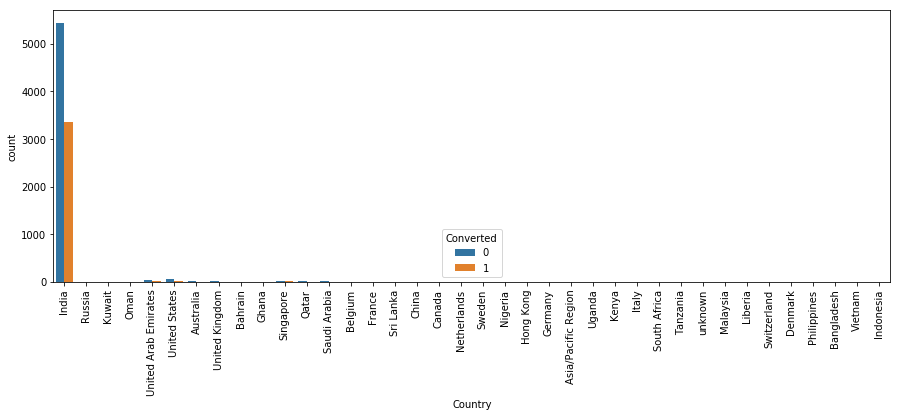

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(x='Country', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

In [66]:
data['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

### <font color=Red>Observation - Country</font>
#####  <font color=Red>More then 95% of records have country as India, this field does not add any information to dataset</font>
#####  <font color=Red>'Country' variable does not add any value and can be dropped</font>

In [67]:
### Dropping the column - COuntry
data=data.drop(columns='Country')

### <font color=blue>10. Specialization vs Conversion ratio</font>

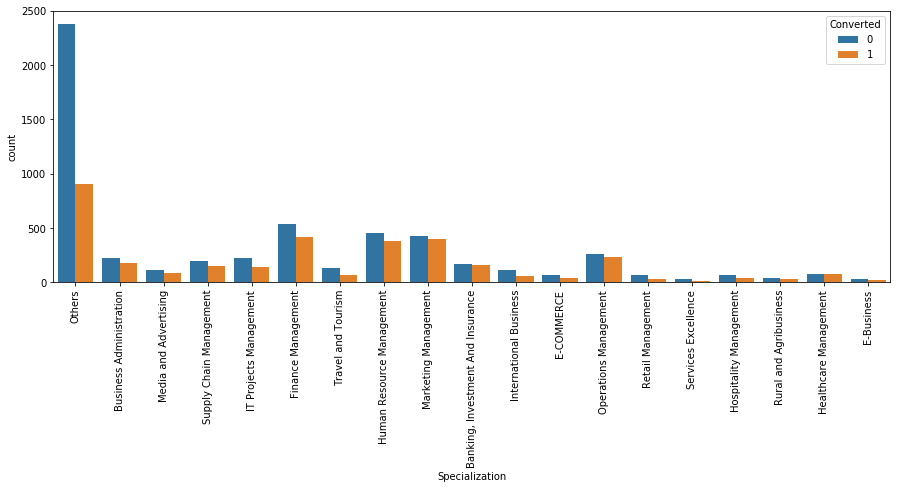

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x='Specialization', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

In [69]:
data['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

### <font color=Red>Observation - Specialization</font>
#####  <font color=Red>Most of the leads have specialization as 'Others'</font>
#####  <font color=Red>None of the specialization have conversion ratio more then 50%</font>

### <font color=blue>11. What is your current occupation vs Conversion ratio</font>

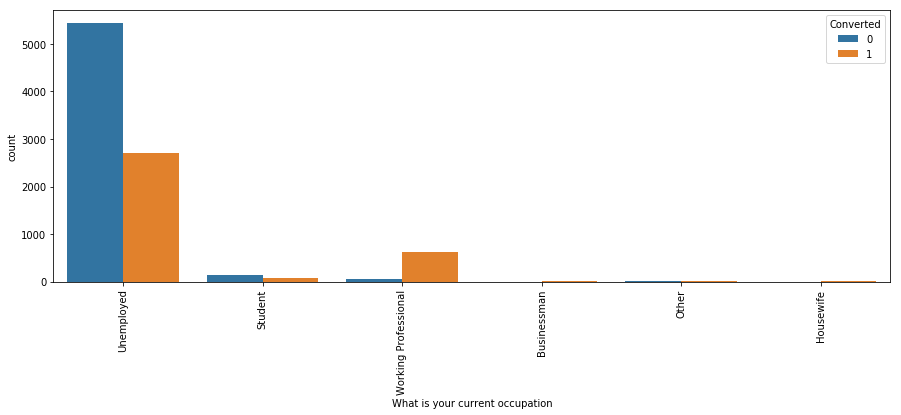

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(x='What is your current occupation', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

In [71]:
data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

### <font color=Red>Observation - What is your current occupation</font>
#####  <font color=Red>More then 90% of leads are 'unemployed'</font>
#####  <font color=Red>Maximum conversion rate is for the 'Working Professional'</font>

### <font color=blue>12. Tags vs Conversion ratio</font>

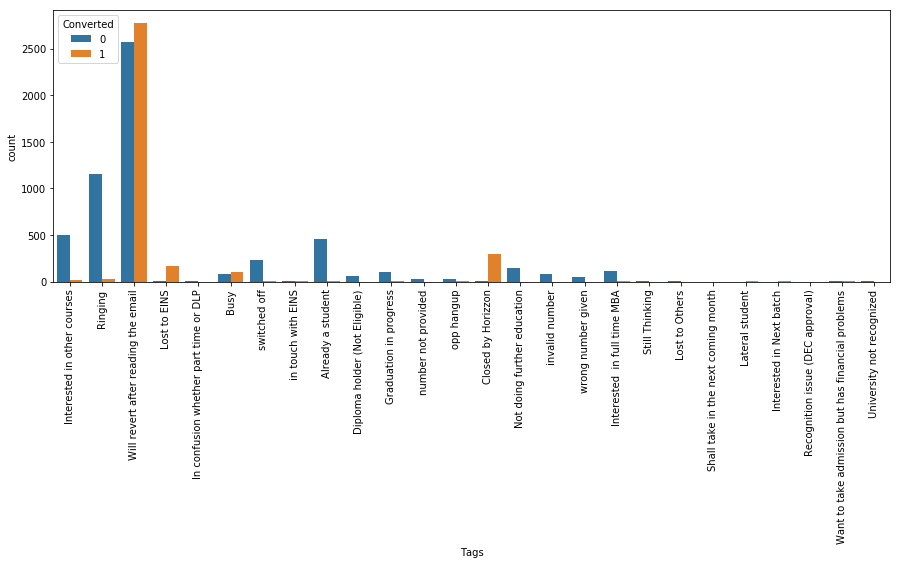

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(x='Tags', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

In [73]:
# Combining Tags which contribute less than 1% in single category 'Other Tags'
temp = pd.DataFrame(data['Tags'].value_counts())
col_replace = temp[temp['Tags']<(len(data)*0.01)].index
data['Tags'] = data['Tags'].replace(col_replace, 'Other Tags')

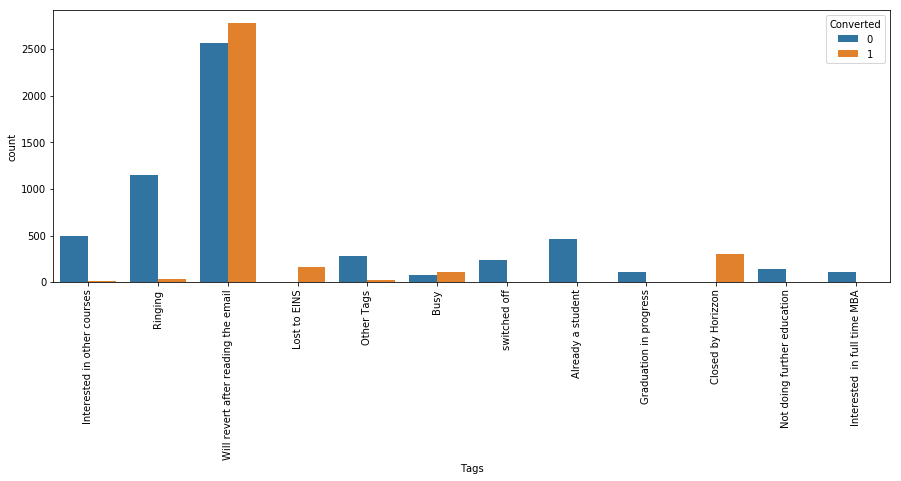

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(x='Tags', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

### <font color=Red>Observation - Tags</font>
#####  <font color=Red>Maximum number of leads have tag of 'Will revert after reading the email which have more than 50% conversion rate'</font>

### <font color=blue>13. Lead Quality vs Conversion ratio</font>

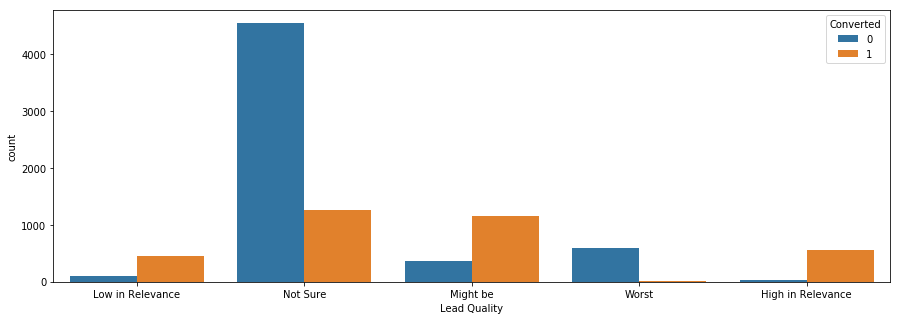

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(x='Lead Quality', hue='Converted', data = data)
plt.show()

### <font color=Red>Observation - Lead Quality</font>
#####  <font color=Red>Maximum number of leads have 'Lead Quality' as 'Not Sure'</font>
#####  <font color=Red>'Lead Quality' except 'Not Sure' and 'Worst' have more than 50% conversion rate</font>

### <font color=blue>14. City vs Conversion ratio</font>

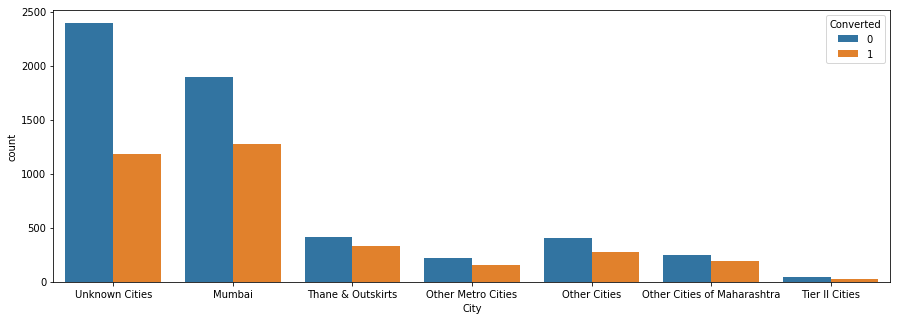

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(x='City', hue='Converted', data = data)
plt.show()

### <font color=Red>Observation - City</font>
#####  <font color=Red>Most of the leads have City as 'Unknown Cities' followed by 'Mumbai'</font>
#####  <font color=Red>None of the City have conversion ratio more then 50%</font>

### <font color=blue>15. A free copy of Mastering The Interview vs Conversion ratio</font>

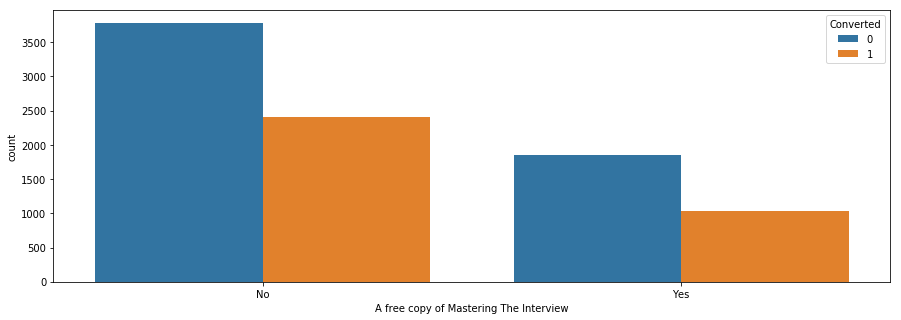

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data = data)
plt.show()

In [78]:
data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

### <font color=Red>Observation - A free copy of Mastering The Interview</font>
#####  <font color=Red>Most of the leads have more than 65% 'A free copy of Mastering The Interview' as 'No'</font>
#####  <font color=Red>None of the 'A free copy of Mastering The Interview' have conversion ratio more then 50%</font>

### <font color=blue>16. Last Notable Activity vs Conversion ratio</font>

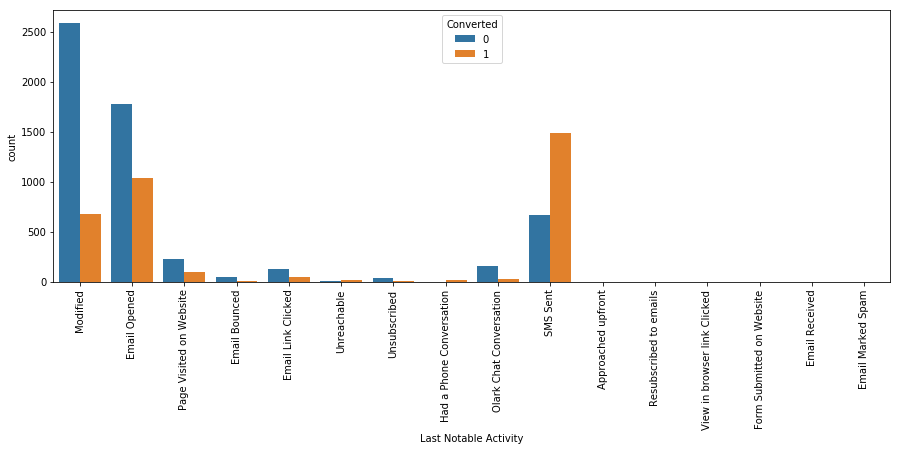

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

In [80]:
# Combining Tags which contribute less than 1% in single category 'Other Tags'
temp = pd.DataFrame(data['Last Notable Activity'].value_counts())
col_replace = temp[temp['Last Notable Activity']<(len(data)*0.01)].index
data['Last Notable Activity'] = data['Last Notable Activity'].replace(col_replace, 'Other Notable Activity')

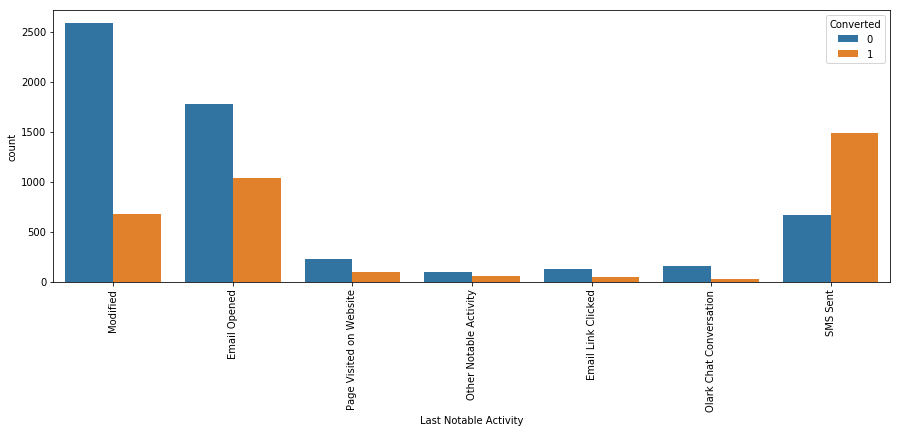

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data = data)
plt.xticks(rotation=90)
plt.show()

### <font color=Red>Observation - Last Notable Activity</font>
#####  <font color=Red>Maximum number of leads have 'Last Notable Activity' as 'Modified'</font>
#####  <font color=Red>Apart from 'SMS Sent' no other 'Last Notable Activity' has conversion rate of moe than 50% </font>

### <font color=blue>Correlation Map of numerical variables</font>

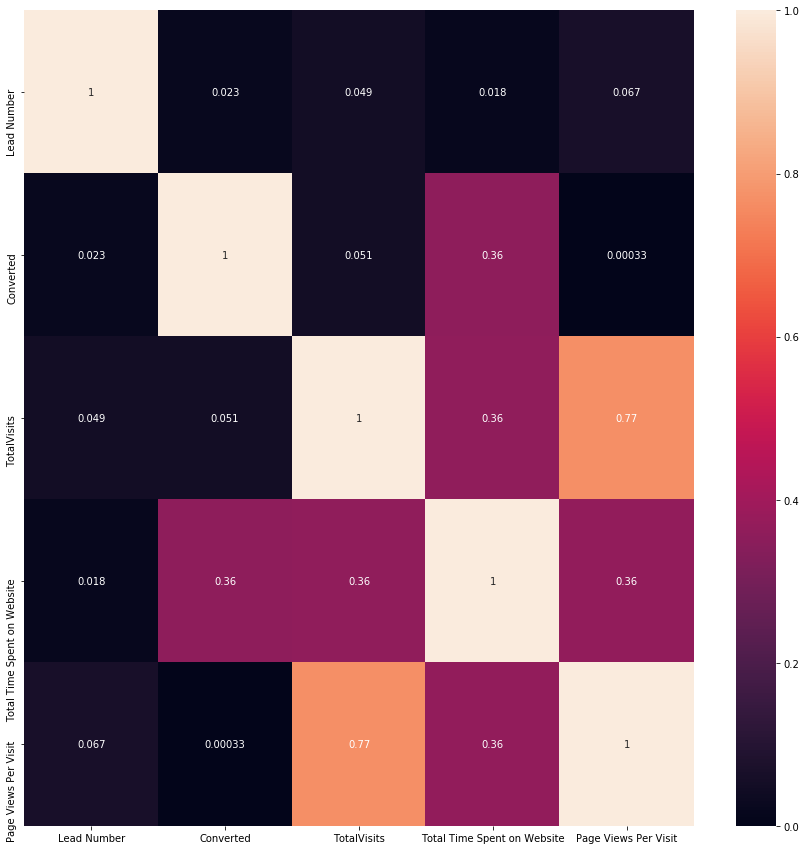

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

### <font color=red>Observation - Apart from 'Page Views Per Visit' vs 'TotalVisits' no other pair of variable shows any strong correlation.

In [83]:
data.shape

(9074, 17)

In [84]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Unknown Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Unknown Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other Activity,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [85]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.191867,482.887481,2.265943
std,23348.029512,0.485053,2.780618,545.256560,1.790991
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
Lead Quality                              9074 non-null object
City        

### Data Preparation

In [87]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [88]:
# Converting Yes to 1 and No to 0
data['Do Not Email'] = data['Do Not Email'].map({'Yes': 1, 'No': 0})
data['A free copy of Mastering The Interview'] = data['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})


### Dummy variable creation

In [89]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
Origin = pd.get_dummies(data['Lead Origin'],prefix='Origin',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,Origin],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
Source = pd.get_dummies(data['Lead Source'],prefix='Source',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,Source],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
Lastact = pd.get_dummies(data['Last Activity'],prefix='Lastact',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,Lastact],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
Sp = pd.get_dummies(data['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,Sp],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
Occupn = pd.get_dummies(data['What is your current occupation'],prefix='Occupn',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,Occupn],axis=1)

# Creating a dummy variable for the variable 'Tags'.
TG =pd.get_dummies(data['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,TG],axis=1)

# Creating a dummy variable for the variable 'Lead Quality'. 
lq =pd.get_dummies(data['Lead Quality'],prefix='LQ',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,lq],axis=1)

# Creating a dummy variable for the variable 'City'. 
cy =pd.get_dummies(data['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,cy],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity'.
lnn =pd.get_dummies(data['Last Notable Activity'],prefix='LNN',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,lnn],axis=1)

In [90]:
print(data.shape)
data.head()

(9074, 86)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown Cities,LNN_Email Opened,LNN_Modified,LNN_Olark Chat Conversation,LNN_Other Notable Activity,LNN_Page Visited on Website,LNN_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,1,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Activity,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,1,0,0,0,0


### Dropping the repeated variables

In [91]:
# We have created dummies for the below variables, so we can drop them
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation',
                  'Tags','Lead Quality','City','Last Notable Activity'], 1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 77 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Do Not Email                                9074 non-null int64
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
A free copy of Mastering The Interview      9074 non-null int64
Origin_Landing Page Submission              9074 non-null uint8
Origin_Lead Add Form                        9074 non-null uint8
Origin_Lead Import                          9074 non-null uint8
Source_Facebook                             9074 non-null uint8
Source_Google                               9074 non-null uint8
Source_Misc                                 9074 non-nul

### <font color=blue>Checking Churn Rate</font>

In [93]:
sum(data['Converted'])/len(data['Converted'])*100

37.85541106458012

### <font color=red>Churn Rate is appx. 38%</font>

### <font color=blue>Model Building</font>
Let's start by splitting our data into a training set and a test set.

In [94]:
# Putting feature variable to X
X = data.drop(['Converted','Prospect ID','Lead Number'], axis=1)
# Putting response variable to y
y = data['Converted']

In [95]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Facebook,Source_Google,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown Cities,LNN_Email Opened,LNN_Modified,LNN_Olark Chat Conversation,LNN_Other Notable Activity,LNN_Page Visited on Website,LNN_SMS Sent
3009,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Running  First Training Model

In [97]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.9
Date:                Mon, 26 Aug 2019   Deviance:                       2511.8
Time:                        10:22:41   Pearson chi2:                 3.57e+04
No. Iterations:                    21   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0268      1.900      0.014      0.989      -3.696       3.750
Do Not Email                                -1.3508      0.308     -4.385      0.000      -1.955      -0.747
TotalVisits                                  0.2034      0.087      2.340      0.019       0.033       0.374
Total Time Spent on Website                  1.1447      0.064     18.006      0.000       1.020       1.269
Page Views Per Visit                        -0.3332      0.099     -3.375      0.001      -0.527      -0.140
A free copy of Mastering The Interview      -0.2414      0.177     -1.363      0.173      -0.589       0.106
Origin_Landing Page Submission              -0.8814      0.238     -3.701      0.000      -1.348      -0.415
Origin_Lead Add Form                        -0.3013      1.288     -0.234      0.815      -2.826       2.223
Origin_Lead Import                          26.6328   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Source_Facebook                            -25.4557   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Source_Google                                0.0985      0.182      0.541      0.589      -0.259       0.456
Source_Misc                                  0.5336      0.814      0.655      0.512      -1.062       2.129
Source_Olark Chat                            0.7929      0.244      3.246      0.001       0.314       1.272
Source_Organic Search                        0.1847      0.212      0.870      0.384      -0.231       0.601
Source_Reference                             1.6402      1.352      1.213      0.225      -1.010       4.290
Source_Referral Sites                       -0.1749      0.492     -0.355      0.722      -1.140       0.790
Source_Welingak Website                      5.2926      1.490      3.553      0.000       2.373       8.212
Lastact_Email Bounced                       -0.1658      0.696     -0.238      0.812      -1.529       1.198
Lastact_Email Link Clicked                   0.8208      0.644      1.275      0.202      -0.441       2.083
Lastact_Email Opened                         0.0009      0.385      0.002      0.998      -0.755       0.756
Lastact_Form Submitted on Website            0.0763      0.588      0.130      0.897      -1.077       1.229
Lastact_Olark Chat Conversation             -0.5497      0.392     -1.403      0.161      -1.318       0.218
Lastact_Other Activity                       0.6161      0.616      1.001      0.317      -0.590       1.823
Lastact_Page Visited on Website              0.5206      0.457      1.140      0.254      -0.374       1.416
Lastact_SMS Sent                             1.1394      0.362      3.147      0.002       0.430       1.849
Specialization_Business Administration      -0.2287      0.394     -0.580      0.562      -1.002       0.545
S

### <font color=blue>Feature Selection Using RFE</font>

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 24),
 ('Origin_Landing Page Submission', False, 7),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', True, 1),
 ('Source_Facebook', False, 32),
 ('Source_Google', False, 44),
 ('Source_Misc', False, 45),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 40),
 ('Source_Reference', False, 52),
 ('Source_Referral Sites', False, 20),
 ('Source_Welingak Website', True, 1),
 ('Lastact_Email Bounced', False, 25),
 ('Lastact_Email Link Clicked', False, 39),
 ('Lastact_Email Opened', False, 38),
 ('Lastact_Form Submitted on Website', False, 46),
 ('Lastact_Olark Chat Conversation', True, 1),
 ('Lastact_Other Activity', False, 9),
 ('Lastact_Page Visited on Website', False, 22),
 ('Lastact_SMS Sent', False, 6),
 ('Specialization_Business Administration', False, 51),
 ('Specializatio

In [102]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Origin_Lead Add Form',
       'Origin_Lead Import', 'Source_Olark Chat', 'Source_Welingak Website',
       'Lastact_Olark Chat Conversation', 'Occupn_Working Professional',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'LQ_Not Sure', 'LQ_Worst', 'LNN_Other Notable Activity',
       'LNN_SMS Sent'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Origin_Landing Page Submission', 'Source_Facebook', 'Source_Google',
       'Source_Misc', 'Source_Organic Search', 'Source_Reference',
       'Source_Referral Sites', 'Lastact_Email Bounced',
       'Lastact_Email Link Clicked', 'Lastact_Email Opened',
       'Lastact_Form Submitted on Website', 'Lastact_Other Activity',
       'Lastact_Page Visited on Website', 'Lastact_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Op

##### Assessing the model with StatsModels

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.7
Date:                Mon, 26 Aug 2019   Deviance:                       2677.3
Time:                        10:22:47   Pearson chi2:                 2.41e+04
No. Iterations:                     9   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1235      0.387     -5.482      0.000      -2.883      -1.364
Do Not Email                                -1.6983      0.253     -6.716      0.000      -2.194      -1.203
Total Time Spent on Website                  1.1475      0.060     18.986      0.000       1.029       1.266
Origin_Lead Add Form                         2.4324      0.369      6.599      0.000       1.710       3.155
Origin_Lead Import                           1.8203      0.739      2.462      0.014       0.371       3.270
Source_Olark Chat                            1.3413      0.144      9.298      0.000       1.059       1.624
Source_Welingak Website                      3.2790      0.822      3.989      0.000       1.668       4.890
Lastact_Olark Chat Conversation             -1.4388      0.208     -6.930      0.000      -1.846      -1.032
Occupn_Working Professional                  1.2513      0.316      3.957      0.000       0.631       1.871
Tags_Busy                                    3.1719      0.461      6.878      0.000       2.268       4.076
Tags_Closed by Horizzon                      7.6078      0.838      9.084      0.000       5.966       9.249
Tags_Interested in other courses            -0.2440      0.525     -0.465      0.642      -1.273       0.785
Tags_Lost to EINS                            8.6385      0.824     10.484      0.000       7.023      10.253
Tags_Other Tags                             -0.3941      0.529     -0.745      0.456      -1.431       0.642
Tags_Ringing                                -1.9310      0.475     -4.069      0.000      -2.861      -1.001
Tags_Will revert after reading the email     3.5543      0.393      9.049      0.000       2.784       4.324
Tags_switched off                           -2.5964      0.710     -3.655      0.000      -3.989      -1.204
LQ_Not Sure                                 -3.1001      0.138    -22.396      0.000      -3.371      -2.829
LQ_Worst                                    -3.9317      0.895     -4.391      0.000      -5.687      -2.177
LNN_Other Notable Activity                   1.3987      0.369      3.787      0.000       0.675       2.122
LNN_SMS Sent                                 2.5554      0.133     19.210      0.000       2.295       2.816
============================================================================================================
"""

### <font color=blue>Dropping columns based on P value - 'Tags_Interested in other courses'</font>

In [105]:
col = col.drop('Tags_Interested in other courses',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.8
Date:                Mon, 26 Aug 2019   Deviance:                       2677.6
Time:                        10:22:47   Pearson chi2:                 2.40e+04
No. Iterations:                     9   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2546      0.275     -8.190      0.000      -2.794      -1.715
Do Not Email                                -1.6964      0.253     -6.707      0.000      -2.192      -1.201
Total Time Spent on Website                  1.1475      0.060     18.985      0.000       1.029       1.266
Origin_Lead Add Form                         2.4301      0.368      6.601      0.000       1.709       3.152
Origin_Lead Import                           1.8204      0.740      2.462      0.014       0.371       3.270
Source_Olark Chat                            1.3403      0.144      9.294      0.000       1.058       1.623
Source_Welingak Website                      3.2806      0.822      3.992      0.000       1.670       4.891
Lastact_Olark Chat Conversation             -1.4371      0.208     -6.923      0.000      -1.844      -1.030
Occupn_Working Professional                  1.2481      0.316      3.951      0.000       0.629       1.867
Tags_Busy                                    3.3033      0.372      8.884      0.000       2.575       4.032
Tags_Closed by Horizzon                      7.7373      0.793      9.752      0.000       6.182       9.292
Tags_Lost to EINS                            8.7634      0.783     11.198      0.000       7.230      10.297
Tags_Other Tags                             -0.2639      0.454     -0.582      0.561      -1.153       0.626
Tags_Ringing                                -1.7990      0.387     -4.649      0.000      -2.557      -1.041
Tags_Will revert after reading the email     3.6856      0.283     13.038      0.000       3.132       4.240
Tags_switched off                           -2.4647      0.655     -3.761      0.000      -3.749      -1.180
LQ_Not Sure                                 -3.0999      0.138    -22.392      0.000      -3.371      -2.829
LQ_Worst                                    -3.8568      0.888     -4.344      0.000      -5.597      -2.117
LNN_Other Notable Activity                   1.3978      0.369      3.784      0.000       0.674       2.122
LNN_SMS Sent                                 2.5547      0.133     19.214      0.000       2.294       2.815
============================================================================================================
"""

### <font color=blue>Dropping columns based on P value - 'Tags_Other Tags'</font>

In [106]:
col = col.drop('Tags_Other Tags',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.9
Date:                Mon, 26 Aug 2019   Deviance:                       2677.9
Time:                        10:22:47   Pearson chi2:                 2.39e+04
No. Iterations:                     9   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3465      0.231    -10.150      0.000      -2.800      -1.893
Do Not Email                                -1.7016      0.252     -6.740      0.000      -2.196      -1.207
Total Time Spent on Website                  1.1471      0.060     18.984      0.000       1.029       1.266
Origin_Lead Add Form                         2.4171      0.367      6.593      0.000       1.699       3.136
Origin_Lead Import                           1.8069      0.737      2.453      0.014       0.363       3.251
Source_Olark Chat                            1.3409      0.144      9.301      0.000       1.058       1.623
Source_Welingak Website                      3.2938      0.821      4.011      0.000       1.684       4.903
Lastact_Olark Chat Conversation             -1.4385      0.208     -6.928      0.000      -1.845      -1.031
Occupn_Working Professional                  1.2578      0.316      3.977      0.000       0.638       1.878
Tags_Busy                                    3.4005      0.336     10.126      0.000       2.742       4.059
Tags_Closed by Horizzon                      7.8296      0.779     10.051      0.000       6.303       9.356
Tags_Lost to EINS                            8.8521      0.769     11.507      0.000       7.344      10.360
Tags_Ringing                                -1.6986      0.350     -4.858      0.000      -2.384      -1.013
Tags_Will revert after reading the email     3.7794      0.238     15.902      0.000       3.314       4.245
Tags_switched off                           -2.3635      0.634     -3.731      0.000      -3.605      -1.122
LQ_Not Sure                                 -3.0999      0.138    -22.389      0.000      -3.371      -2.829
LQ_Worst                                    -3.8112      0.888     -4.290      0.000      -5.552      -2.070
LNN_Other Notable Activity                   1.3966      0.369      3.783      0.000       0.673       2.120
LNN_SMS Sent                                 2.5454      0.132     19.322      0.000       2.287       2.804
============================================================================================================
"""

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,3.13
14,LQ_Not Sure,3.04
4,Source_Olark Chat,1.83
2,Origin_Lead Add Form,1.82
17,LNN_SMS Sent,1.59
11,Tags_Ringing,1.55
1,Total Time Spent on Website,1.43
6,Lastact_Olark Chat Conversation,1.42
5,Source_Welingak Website,1.37
7,Occupn_Working Professional,1.27


### <font color=blue>Dropping columns based on correlation - 'Tags_Will revert after reading the email'</font>

In [109]:
# Dropping highly correlated variable "Tags_Will revert after reading the email"
col = col.drop('Tags_Will revert after reading the email',1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1569.9
Date:                Mon, 26 Aug 2019   Deviance:                       3139.9
Time:                        10:22:48   Pearson chi2:                 1.92e+04
No. Iterations:                     8   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5247      0.098      5.371      0.000       0.333       0.716
Do Not Email                       -1.9216      0.246     -7.820      0.000      -2.403      -1.440
Total Time Spent on Website         1.1486      0.055     21.032      0.000       1.042       1.256
Origin_Lead Add Form                2.7024      0.329      8.217      0.000       2.058       3.347
Origin_Lead Import                  1.8351      0.635      2.888      0.004       0.590       3.081
Source_Olark Chat                   1.5286      0.136     11.206      0.000       1.261       1.796
Source_Welingak Website             3.4609      0.810      4.271      0.000       1.873       5.049
Lastact_Olark Chat Conversation    -1.4999      0.198     -7.590      0.000      -1.887      -1.113
Occupn_Working Professional         1.2199      0.249      4.890      0.000       0.731       1.709
Tags_Busy                           0.0376      0.247      0.152      0.879      -0.446       0.521
Tags_Closed by Horizzon             4.6912      0.756      6.202      0.000       3.209       6.174
Tags_Lost to EINS                   6.0832      0.803      7.576      0.000       4.509       7.657
Tags_Ringing                       -4.8603      0.278    -17.462      0.000      -5.406      -4.315
Tags_switched off                  -5.3557      0.600     -8.927      0.000      -6.531      -4.180
LQ_Not Sure                        -2.5983      0.110    -23.592      0.000      -2.814      -2.382
LQ_Worst                           -6.0562      0.608     -9.959      0.000      -7.248      -4.864
LNN_Other Notable Activity          1.5436      0.337      4.583      0.000       0.884       2.204
LNN_SMS Sent                        2.6293      0.122     21.597      0.000       2.391       2.868
===================================================================================================
"""

### <font color=blue>Dropping columns based on P value - 'Tags_Busy'</font>

In [110]:
col = col.drop('Tags_Busy',1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.0
Date:                Mon, 26 Aug 2019   Deviance:                       3139.9
Time:                        10:22:48   Pearson chi2:                 1.92e+04
No. Iterations:                     8   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5255      0.098      5.387      0.000       0.334       0.717
Do Not Email                       -1.9224      0.246     -7.826      0.000      -2.404      -1.441
Total Time Spent on Website         1.1486      0.055     21.035      0.000       1.042       1.256
Origin_Lead Add Form                2.7012      0.329      8.216      0.000       2.057       3.346
Origin_Lead Import                  1.8339      0.635      2.886      0.004       0.588       3.079
Source_Olark Chat                   1.5272      0.136     11.222      0.000       1.260       1.794
Source_Welingak Website             3.4604      0.810      4.271      0.000       1.872       5.048
Lastact_Olark Chat Conversation    -1.5003      0.198     -7.593      0.000      -1.888      -1.113
Occupn_Working Professional         1.2190      0.249      4.888      0.000       0.730       1.708
Tags_Closed by Horizzon             4.6903      0.756      6.201      0.000       3.208       6.173
Tags_Lost to EINS                   6.0823      0.803      7.575      0.000       4.508       7.656
Tags_Ringing                       -4.8637      0.278    -17.526      0.000      -5.408      -4.320
Tags_switched off                  -5.3591      0.600     -8.939      0.000      -6.534      -4.184
LQ_Not Sure                        -2.5975      0.110    -23.609      0.000      -2.813      -2.382
LQ_Worst                           -6.0565      0.608     -9.961      0.000      -7.248      -4.865
LNN_Other Notable Activity          1.5444      0.337      4.585      0.000       0.884       2.205
LNN_SMS Sent                        2.6322      0.120     21.873      0.000       2.396       2.868
===================================================================================================
"""

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,LQ_Not Sure,1.78
4,Source_Olark Chat,1.73
2,Origin_Lead Add Form,1.72
6,Lastact_Olark Chat Conversation,1.41
15,LNN_SMS Sent,1.38
5,Source_Welingak Website,1.36
1,Total Time Spent on Website,1.33
10,Tags_Ringing,1.24
0,Do Not Email,1.22
7,Occupn_Working Professional,1.18


In [112]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3009    0.094822
1012    0.135723
9226    0.001611
4750    0.920393
7987    0.998217
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.09482199, 0.1357226 , 0.00161105, ..., 0.06767082, 0.10664599,
       0.31548717])

### <font color=blue> Dataframe with actual Converted Flag and predicted probabilities</font>

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.094822,3009
1,0,0.135723,1012
2,0,0.001611,9226
3,1,0.920393,4750
4,1,0.998217,7987


### <font color=blue>Creating new column 'Predicted' which will have 1 for Converted_prob>0.5 else 0</font>

In [115]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.094822,3009,0
1,0,0.135723,1012,0
2,0,0.001611,9226,0
3,1,0.920393,4750,1
4,1,0.998217,7987,1


### <font color=blue>Confusion Matrix</font>

In [116]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3666  239]
 [ 364 2082]]


### <font color=blue>Accuracy</font>

In [117]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9050543221539915

### <font color=blue>Other Metrics</font>

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8511856091578087

In [120]:
# specificity
TN / float(TN+FP)

0.9387964148527529

In [121]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.06120358514724712


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.8970271434726411


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9096774193548387


### <font color=blue>ROC Curve</font>

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

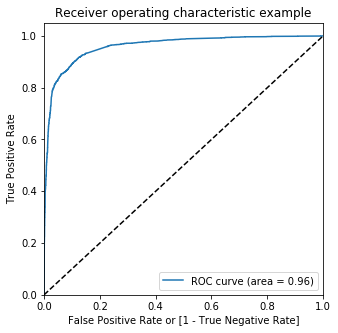

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### <font color=blue>Deducing Optimal Cutoff Point</font>

In [127]:
#create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.094822,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.135723,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.001611,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.920393,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998217,7987,1,1,1,1,1,1,1,1,1,1,1


In [128]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.817981  0.968929  0.723431
0.2   0.2  0.882066  0.932543  0.850448
0.3   0.3  0.891828  0.916190  0.876569
0.4   0.4  0.896709  0.890025  0.900896
0.5   0.5  0.905054  0.851186  0.938796
0.6   0.6  0.904425  0.816026  0.959795
0.7   0.7  0.900488  0.790270  0.969526
0.8   0.8  0.871674  0.700736  0.978745
0.9   0.9  0.837348  0.599755  0.986172


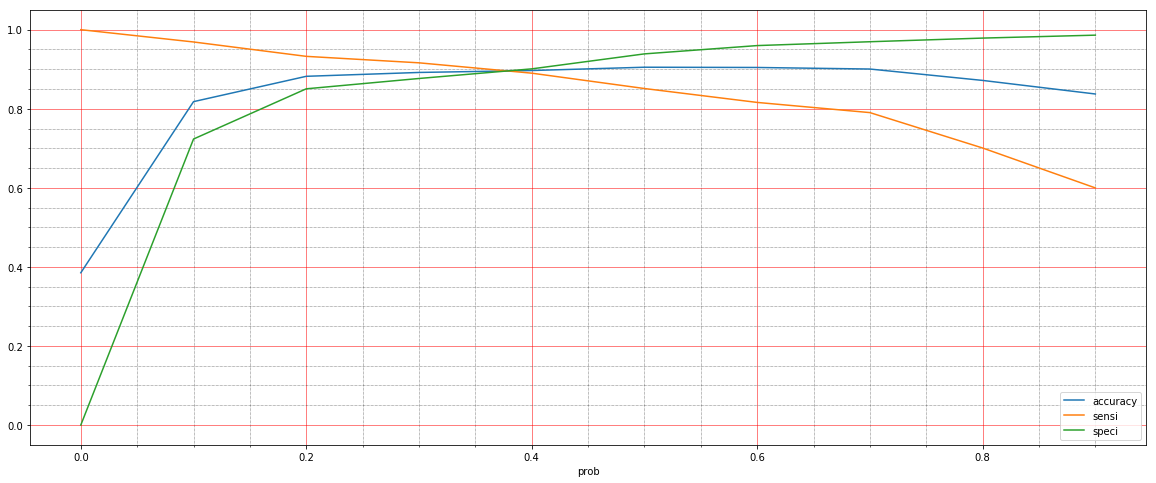

In [129]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid=True, figsize=(20,8))

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

### <font color=red>From the curve above, 0.38 is the optimum point to take it as a cutoff probability</font>

In [130]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.094822,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.135723,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.001611,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.920393,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998217,7987,1,1,1,1,1,1,1,1,1,1,1,1


### <font color=blue>Accuracy</font>

In [131]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.891828058573453

In [132]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3423,  482],
       [ 205, 2241]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.9161896974652494

In [135]:
# specificity
TN / float(TN+FP)

0.8765685019206146

In [136]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.1234314980793854


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.8229893499816379


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9434950385887542


### <font color=blue>Precision and Recall</font>

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3666,  239],
       [ 364, 2082]], dtype=int64)

##### Precision
TP / TP + FP

In [140]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8970271434726411

##### Recall
TP / TP + FN

In [141]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8511856091578087

In [142]:
from sklearn.metrics import precision_score, recall_score

In [143]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8970271434726411

In [144]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8511856091578087

### <font color=blue>Precision and recall tradeoff</font>

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

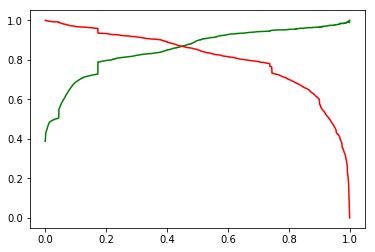

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### <font color=blue>Predictions on the test set</font>

In [149]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [150]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Origin_Lead Add Form,Origin_Lead Import,Source_Olark Chat,Source_Welingak Website,Lastact_Olark Chat Conversation,Occupn_Working Professional,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_switched off,LQ_Not Sure,LQ_Worst,LNN_Other Notable Activity,LNN_SMS Sent
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [151]:
X_test_sm = sm.add_constant(X_test)

##### <font color=blue>Making prediction on test dataset</font>

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

3271    0.059417
1490    0.980398
7936    0.050362
4216    0.998989
3830    0.060247
1800    0.707636
6507    0.006353
4821    0.000898
4223    0.992141
4714    0.172846
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
y_pred_1.head()

,0
3271,0.059417
1490,0.980398
7936,0.050362
4216,0.998989
3830,0.060247


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.059417
1,1,1490,0.980398
2,0,7936,0.050362
3,1,4216,0.998989
4,0,3830,0.060247


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [163]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.059417
1,1490,1,0.980398
2,7936,0,0.050362
3,4216,1,0.998989
4,3830,0,0.060247


In [164]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,3271,0,0.059417,0
1,1490,1,0.980398,1
2,7936,0,0.050362,0
3,4216,1,0.998989,1
4,3830,0,0.060247,0


### <font color=blue>Accuracy</font>

In [166]:
# Overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8854204921042967

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1542,  192],
       [ 120,  869]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8786653185035389

In [170]:
# specificity
TN / float(TN+FP)

0.889273356401384

In [171]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11072664359861592


In [172]:
# positive predictive value 
print (TP / float(TP+FP))

0.819038642789821


In [173]:
# Negative predictive value
print (TN / float(TN+ FN))

0.927797833935018


### <font color=red> Assigning the final Lead score based on the generated model</font>

In [174]:
y_pred_final['Final_Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(100*x))

In [175]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Final_Lead_Score
0,3271,0,0.059417,0,6
1,1490,1,0.980398,1,98
2,7936,0,0.050362,0,5
3,4216,1,0.998989,1,100
4,3830,0,0.060247,0,6


In [176]:
res.params.sort_values(ascending=False)

Tags_Lost to EINS                  6.082330
Tags_Closed by Horizzon            4.690331
Source_Welingak Website            3.460390
Origin_Lead Add Form               2.701231
LNN_SMS Sent                       2.632199
Origin_Lead Import                 1.833850
LNN_Other Notable Activity         1.544432
Source_Olark Chat                  1.527203
Occupn_Working Professional        1.219043
Total Time Spent on Website        1.148634
const                              0.525456
Lastact_Olark Chat Conversation   -1.500313
Do Not Email                      -1.922382
LQ_Not Sure                       -2.597512
Tags_Ringing                      -4.863670
Tags_switched off                 -5.359062
LQ_Worst                          -6.056516
dtype: float64

### <font color=blue>The coefficient of logistic regression are log odds , hence calculating the actual odds helps in deciding the ranking of variables.</font>

In [177]:
np.exp(res.params).sort_values(ascending=False)

Tags_Lost to EINS                  438.048737
Tags_Closed by Horizzon            108.889203
Source_Welingak Website             31.829394
Origin_Lead Add Form                14.898053
LNN_SMS Sent                        13.904307
Origin_Lead Import                   6.257935
LNN_Other Notable Activity           4.685309
Source_Olark Chat                    4.605279
Occupn_Working Professional          3.383949
Total Time Spent on Website          3.153881
const                                1.691229
Lastact_Olark Chat Conversation      0.223060
Do Not Email                         0.146258
LQ_Not Sure                          0.074459
Tags_Ringing                         0.007722
Tags_switched off                    0.004705
LQ_Worst                             0.002343
dtype: float64

### Current ROC score

In [178]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8839693374524614

### We have split the data into test and train for our model generation. We have successfully generated Lead scores for test train. lets do the same for train data and the append both these dataframes to create the final dataframe.

In [179]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.094822,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.135723,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.001611,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.920393,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998217,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [180]:
y_train_pred_final['Final_Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(100*x))

In [181]:
Lead_Score=y_train_pred_final[['Prospect ID','Final_Lead_Score']]
#df1.append(df2)
Lead_Score.head()

,Prospect ID,Final_Lead_Score
0,3009,9
1,1012,14
2,9226,0
3,4750,92
4,7987,100


In [182]:
temp_score_df=y_pred_final[['Prospect ID','Final_Lead_Score']]
Lead_Score.append(temp_score_df)

,Prospect ID,Final_Lead_Score
0,3009,9
1,1012,14
2,9226,0
3,4750,92
4,7987,100
5,1281,99
6,2880,4
7,4971,94
8,7536,98
9,1248,1


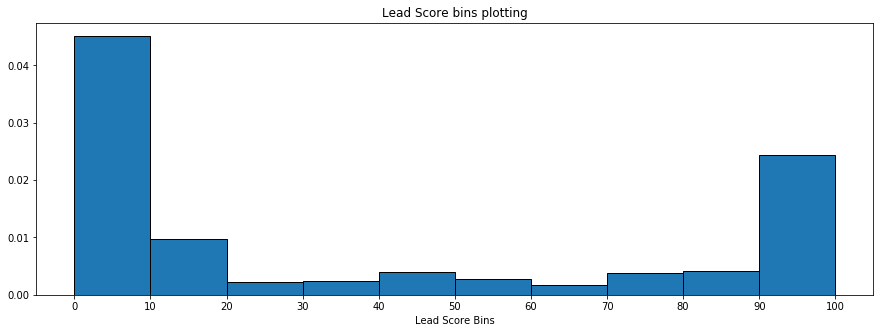

In [183]:
plt.figure(figsize=(15,5))
plt.hist(Lead_Score['Final_Lead_Score'], bins=10, normed=True,edgecolor='black')
plt.title('Lead Score bins plotting')
plt.xlabel('Lead Score Bins')
plt.xticks(range(0,101,10))
plt.show()

### Current Recall Score

In [184]:
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)

0.88

In [185]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [186]:
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.88

In [187]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [188]:
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.89

In [189]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [190]:
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.91

In [191]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.01 else 0)
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.99

In [192]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0 else 0)
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

1.0

In [193]:
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.36

In [194]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.15 else 0)
round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.95

### Current Precision score at threshold of 0.38

In [195]:
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)

0.82

In [196]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.87

In [197]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.6 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.9

In [198]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.75 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.94

In [199]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.9 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.96

In [200]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.95 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.98

In [201]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.99 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.99

In [202]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.9999 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

1.0

In [203]:
y_pred_final['Final_Predicted_Recall'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
round(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Recall),2)

0.95